In [1]:
from keras import models
from keras import layers
from keras.datasets import mnist

Using TensorFlow backend.


## Exemplo MNIST

In [2]:
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data()

In [3]:
network = models.Sequential()

In [4]:
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [5]:
network.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [6]:
digit = test_images[90]
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [7]:
from keras.utils import to_categorical

In [8]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
network.fit(train_images, train_labels, epochs=3, batch_size=128)

Epoch 1/3
60000/60000 [==============================] - 9s 156us/step - loss: 0.2546 - accuracy: 0.9262
Epoch 2/3
60000/60000 [==============================] - 1s 18us/step - loss: 0.1044 - accuracy: 0.9695
Epoch 3/3
60000/60000 [==============================] - 1s 18us/step - loss: 0.0683 - accuracy: 0.9795


In [10]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(test_loss, test_acc)

10000/10000 [==============================] - 0s 43us/step
0.08201343419300393 0.9729999899864197


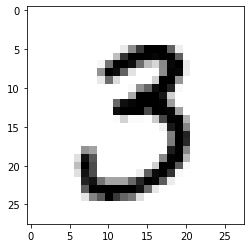

In [11]:
import matplotlib.pyplot as plt

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [12]:
resultados = network.predict(test_images)

In [13]:
for i, probabilidade in enumerate(resultados[90]):
    if(probabilidade > .1):
        print("A probabilidade de ser {0} é {1}".format(i, probabilidade))

A probabilidade de ser 3 é 0.9924829602241516


### IMDB movies example

In [12]:
from keras.datasets import imdb

In [13]:
(train_data, train_labels) , (test_data, test_labels) = imdb.load_data(num_words=10000)

In [97]:
len(train_data)

8982

In [14]:
max(max(seq) for seq in train_data)

9999

In [15]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])

decoded_review = ' '.join([
    reverse_word_index.get(i -3, '?') for i in train_data[0]
])

In [16]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [17]:
import numpy as np

def vectorizes_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorizes_sequences(train_data)
x_test = vectorizes_sequences(train_data)

In [18]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Creating the model 

In [20]:
from keras import models
from keras import layers

In [98]:
model = models.Sequential()
model.add(layers.Dense(16, activation ='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [84]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [85]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [86]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [87]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [99]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 68us/step - loss: 0.5082 - acc: 0.7853 - val_loss: 0.3834 - val_acc: 0.8611
Epoch 2/20
15000/15000 [==============================] - 1s 62us/step - loss: 0.2979 - acc: 0.9064 - val_loss: 0.3017 - val_acc: 0.8903
Epoch 3/20
15000/15000 [==============================] - 1s 62us/step - loss: 0.2173 - acc: 0.9321 - val_loss: 0.2953 - val_acc: 0.8801
Epoch 4/20
15000/15000 [==============================] - 1s 62us/step - loss: 0.1717 - acc: 0.9444 - val_loss: 0.2824 - val_acc: 0.8867
Epoch 5/20
15000/15000 [==============================] - 1s 62us/step - loss: 0.1418 - acc: 0.9541 - val_loss: 0.2931 - val_acc: 0.8833
Epoch 6/20
15000/15000 [==============================] - 1s 62us/step - loss: 0.1185 - acc: 0.9634 - val_loss: 0.2914 - val_acc: 0.8864
Epoch 7/20
15000/15000 [==============================] - 1s 62us/step - loss: 0.0982 - acc: 0.9715 - val_loss: 0.3098 - val_acc

In [81]:
history_dict = history.history

In [28]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [36]:
import matplotlib.pyplot as plt

In [37]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

In [38]:
epochs = range(1, len(acc) + 1)

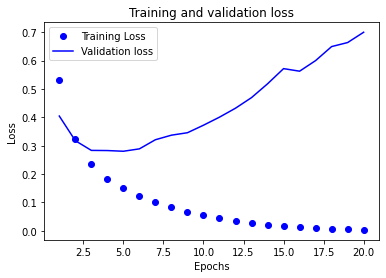

In [42]:
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [44]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

<Figure size 432x288 with 0 Axes>

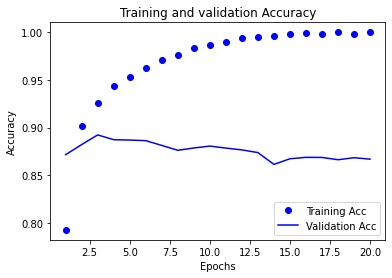

In [45]:
plt.plot(epochs, acc_values, 'bo', label='Training Acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation Acc')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [71]:
model.predict(x_test)

array([[9.9999559e-01],
       [1.3602984e-05],
       [1.8877820e-06],
       ...,
       [9.3752506e-06],
       [9.9999249e-01],
       [1.7884157e-03]], dtype=float32)

## Reuters multiclass news classification 

In [89]:
from keras.datasets import reuters

In [90]:
(train_data, train_labels) , (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 5s 2us/step


In [93]:
import numpy as np

def vectorizes_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [94]:
x_train = vectorizes_sequences(train_data)
x_test = vectorizes_sequences(test_data)

In [96]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_train_labels = to_one_hot(test_labels)